## Loan Prediction Problem

### This excersice is designed to solve binary classification.

#### Expectations:

    1. Introduction to the problem

    2. Exploratory Data Analysis (EDA) and Pre-Processing

    3. Model building and Feature engineering
    
#### Problem Statement:

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer’s eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, that are eligible for loan amounts so that they can specifically target these customers.

It is a classification problem where we have to predict whether a loan would be approved or not. 

In [9]:
# Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Importing data:

# train = pd.read_csv(r"C:\Users\AAvendano\Downloads\PY\ML\MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS\CLASSIFICATION\LOAN_PREDICTION\Data_set\train_u6lujuX_CVtuZ9i.csv")
# test = pd.read_csv(r"C:\Users\AAvendano\Downloads\PY\ML\MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS\CLASSIFICATION\LOAN_PREDICTION\Data_set\test_Y3wMUE5_7gLdaTN.csv")

train = pd.read_csv(r"D:\PROJECTS\MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS\CLASSIFICATION\LOAN_PREDICTION\Data_set\train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv(r"D:\PROJECTS\MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS\CLASSIFICATION\LOAN_PREDICTION\Data_set\test_Y3wMUE5_7gLdaTN.csv")

In [11]:
# To keep the original data, it is a good practice to make a copy. Let's just do that:

train_original = train.copy()
test_original = test.copy()

In [12]:
# Checking the data we have

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### The only difference between the data sets are the Loan status which is the target. That's the one we are going to predict.

## Description for each variable present in the data frame:

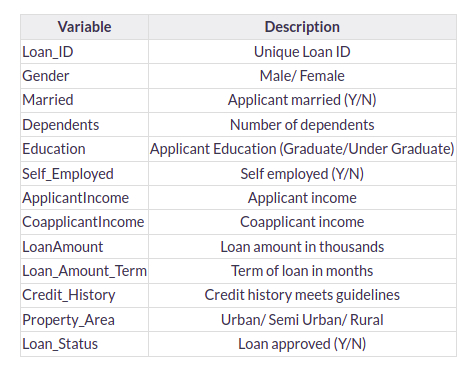

In [14]:
# Understanding the data types:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### We have 6 categorical variables which are:  

    Loan_ID
    Gender
    Married
    Dependents
    Education
    Self_Employed
    Loan_Status
    
### We have 6 numerical variables:

    ApplicantIncome        
    CoapplicantIncome
    LoanAmount
    Loan_Amount_Term
    Credit_History
    Property_Area

In [15]:
# Let's now look at the shape:
train.shape, test.shape

((614, 13), (367, 12))

## Univariate Analysis.

Loan_Status: As it is a categorical variable, let us look at its frequency table, percentage distribution, and bar plot.

In [16]:
# Checking the frecuency
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [17]:
def bar_plot(colomn, bar_orientation = "v", number_format = "f"):
    
    """THIS FUNCTION WILL GRAPH THE BAR PLOT EITHER IN PERCENTAGE OR REAL VALUE:
    
    We have 1 mandatory parameter, and 2 set up by default. On the other hand, these are the we have 3 parameters:
            
        a) Column to graph (MANDATORY)
        b) Bar orientation (1. Horizontal (h) or 2. Vertical (v), set by default)
        c) Number display (1. Percentage (p) or 2. Float (f, set by default))
    
    CONDITIONS:
    
        1. Vertical graph with f
        2. Vertical graph with p
        3. Horizontal graph with f
        4. Horizontal graph with p
    
    """
    
    bar = None # Container (graph)
    X = [] # Final X labels
    y = colomn.value_counts().unique() # y values    
    
    # THIS SECTION WOULD PARSE ALL THE LABELS INTO A STRING:        
    original_X = list(colomn.value_counts(normalize = True).index) # Say, labels
     
    # TURNING THE LABELS INTO A STRING    
    for item in original_X:
        X.append(str(item))
        # End of for
    
    
    title = colomn.value_counts().name # Getting the title
    
    # CONDITIONS: Since the vertical one is set by default, I am just checking the letter h
    
    # 1. horizontal chart with floats
    if((bar_orientation == "h") and (number_format == "f")):
        number_format = "%g" # Format per default
        bar = plt.barh(X, y, fc = "lightgray", ec = "black")
    # 2. horizontal chart with percentages
    elif(bar_orientation == "h" and number_format == "p"):        
        y = colomn.value_counts(normalize = True).unique()*100 # y, the 100 is to show it in percentages.
        number_format = '%.3f%%' # Format of 3 decimal and in percentage
        plt.xlim(0, 100) # X limit to 100%
        bar = plt.barh(X, y, fc = "lightgray", ec = "black")
    # 3. vertical chart with percentages
    elif(bar_orientation == "v" and number_format == "p"):
        number_format = '%.3f%%' # Format of 3 decimal and in percentage
        y = colomn.value_counts(normalize = True).unique()*100 # y, the 100 is to show it in percentages.
        plt.ylim(0, 100) # y limit to 100%
        bar = plt.bar(X, y, fc = "lightgray", ec = "black")
    # 4. vertical chart with floats (default graph)    
    else:
        number_format = "%g" # Format per default
        bar = plt.bar(X, y, fc = "lightgray", ec = "black")
    
      
    plt.bar_label(bar, label_type="edge", padding = 1, fmt=number_format)
    plt.title(title)
    plt.tight_layout()

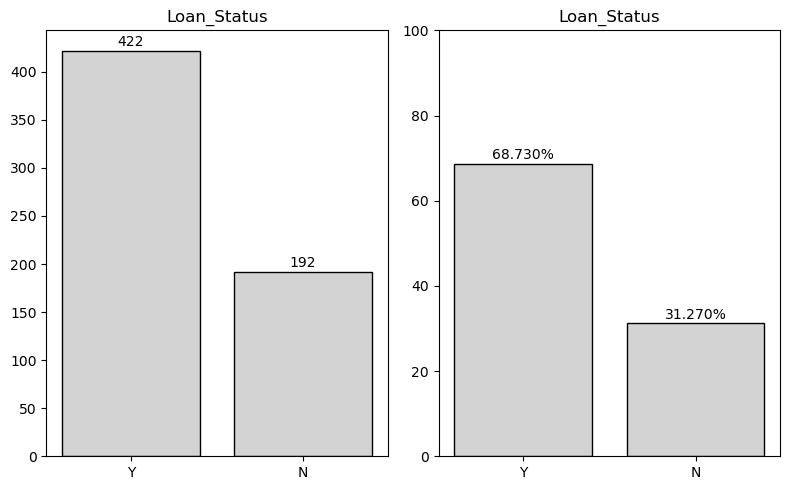

In [18]:
# PLOTTING THE VALUES AND PERCENTAGES

fig=plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
bar_plot(train["Loan_Status"], "v", "f")

plt.subplot(1,2,2)
bar_plot(train["Loan_Status"], "v", "p")

### We can see the distribution here. Around 69% of people got approve in regard to the loan from the total amount of people is 614 (442+192). That's to say, So, from 442 out of 614 got approved.

### Now, let’s visualize each variable separately:

    Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History)

    Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

    Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Loan_Status)
    
### Independent Variable (Categorical): (Gender, Married, Self_Employed, Credit_History)

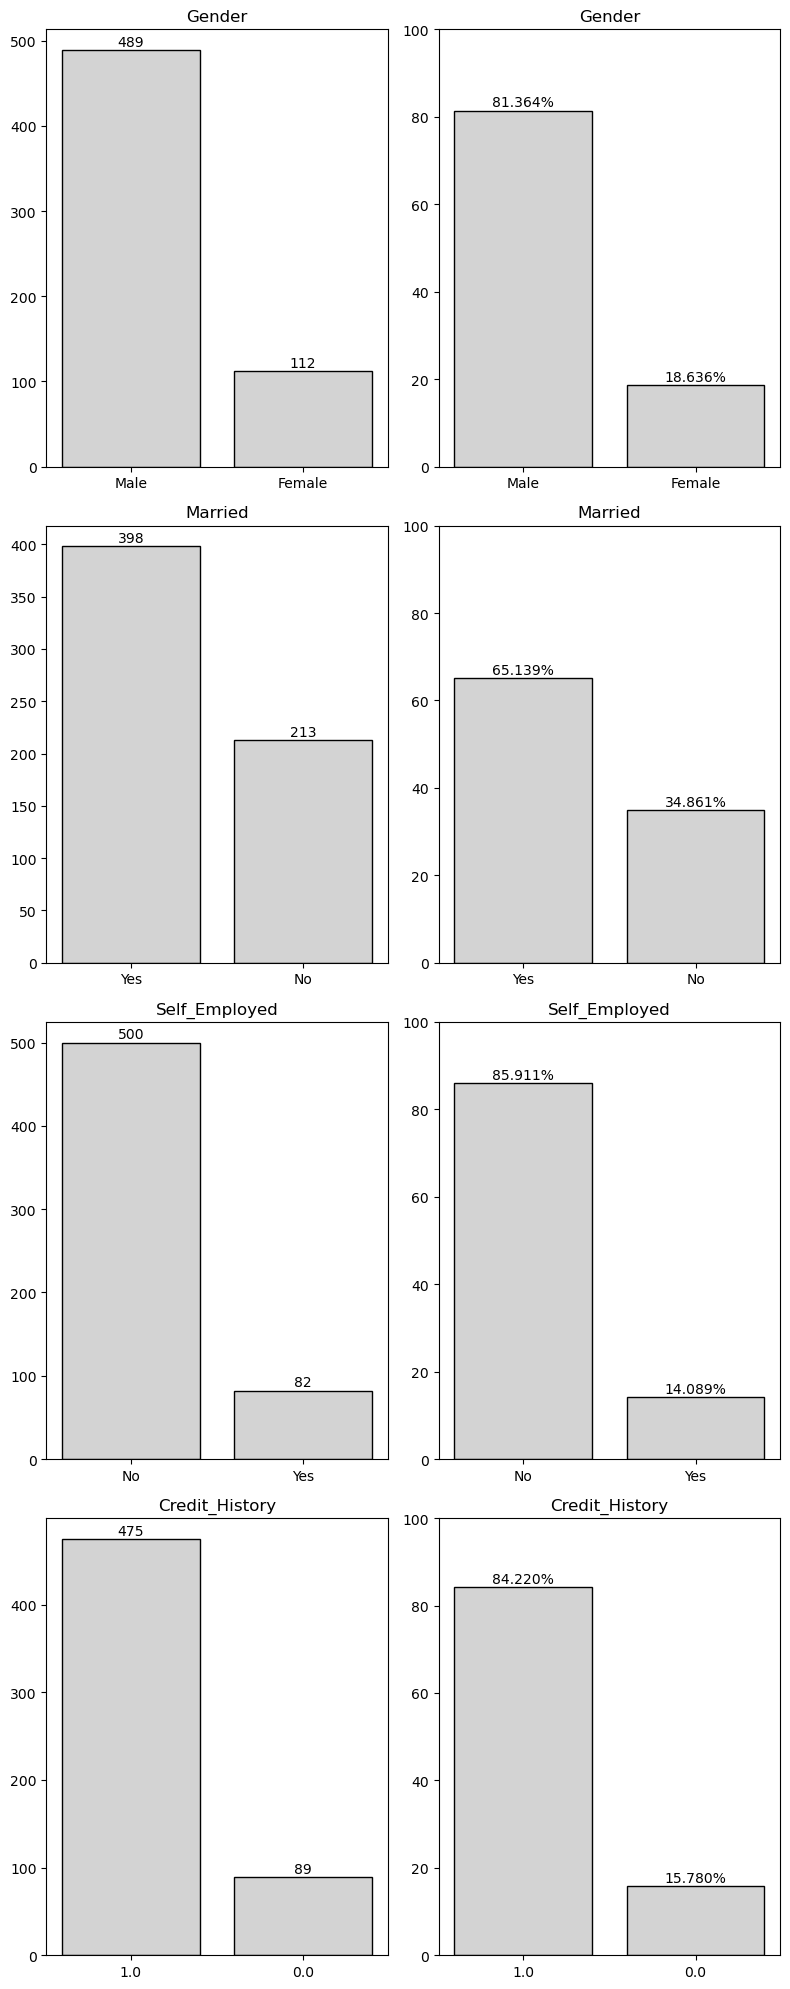

In [19]:
# https://www.w3schools.com/python/matplotlib_subplot.asp

# plot 1 (Gender)
fig=plt.figure(figsize=(8,20))
plt.subplot(4,2,1)
bar_plot(train["Gender"], "v", "f")
plt.subplot(4,2,2)
bar_plot(train["Gender"], "v", "p")

# plot 2 (Married)
plt.subplot(4,2,3)
bar_plot(train["Married"], "v", "f")
plt.subplot(4,2,4)
bar_plot(train["Married"], "v", "p")

# plot 3 (Self_Employed)
plt.subplot(4,2,5)
bar_plot(train["Self_Employed"], "v", "f")
plt.subplot(4,2,6)
bar_plot(train["Self_Employed"], "v", "p")

# plot 4 (Credit_History)
plt.subplot(4,2,7)
bar_plot(train["Credit_History"], "v", "f")
plt.subplot(4,2,8)
bar_plot(train["Credit_History"], "v", "p")

### It can be inferred from the above bar plots that:

    1. 81% of applicants in the dataset are male.
    2. Around 65% of the applicants in the dataset are married.
    3. About 14% of applicants in the dataset are self-employed.
    4. About 84% of applicants have repaid their debts.
    
### Now let’s visualize the ordinal variables: (Dependents, Education, Property_Area)

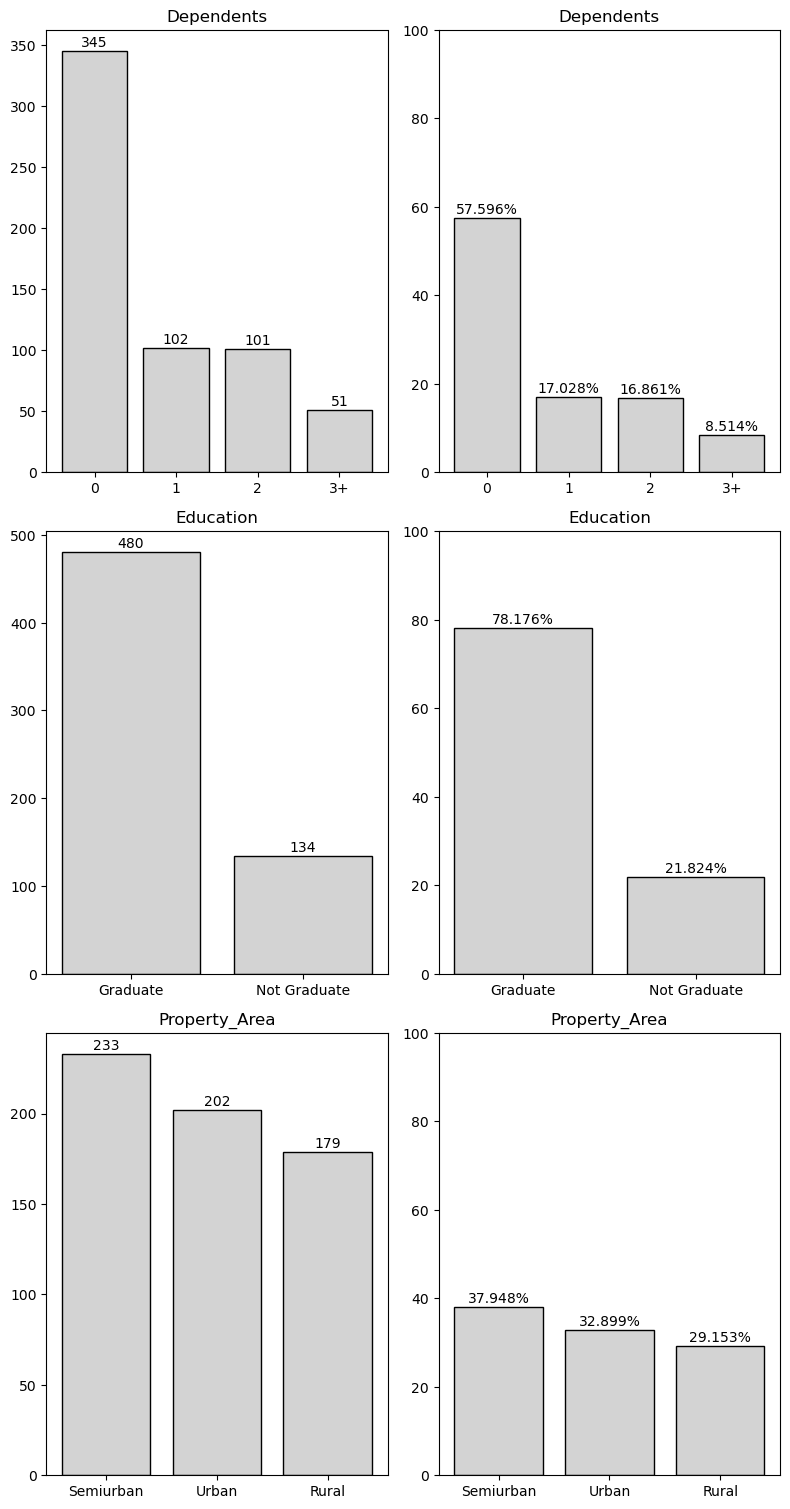

In [20]:
fig=plt.figure(figsize=(8,30))
plt.subplot(6,2,1)
bar_plot(train["Dependents"], "v", "f")
plt.subplot(6,2,2)
bar_plot(train["Dependents"], "v", "p")

plt.subplot(6,2,3)
bar_plot(train["Education"], "v", "f")
plt.subplot(6,2,4)
bar_plot(train["Education"], "v", "p")

plt.subplot(6,2,5)
bar_plot(train["Property_Area"], "v", "f")
plt.subplot(6,2,6)
bar_plot(train["Property_Area"], "v", "p")

### Following inferences can be made from the above bar plots:

    1. Most of the applicants don’t have dependents.
    2. About 79% of the applicants are graduates.
    3. Most of the applicants are from semi-urban areas.
    
### Now, let's vizualize the Independent Variable (Numerical):

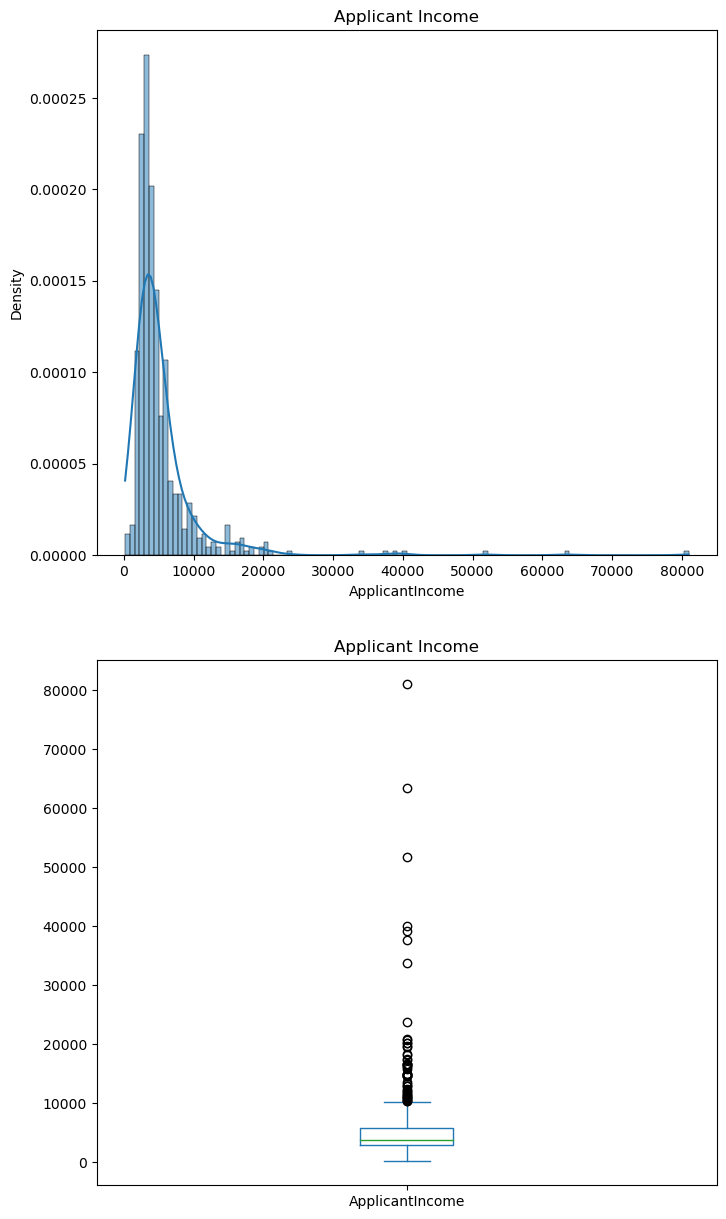

In [21]:
plt.figure(figsize = (8, 15))
plt.subplot(2, 1, 1)
plt.title("Applicant Income")
sns.histplot(train["ApplicantIncome"], kde=True, stat="density")

plt.subplot(2, 1, 2)
plt.title("Applicant Income")
train["ApplicantIncome"].plot.box();

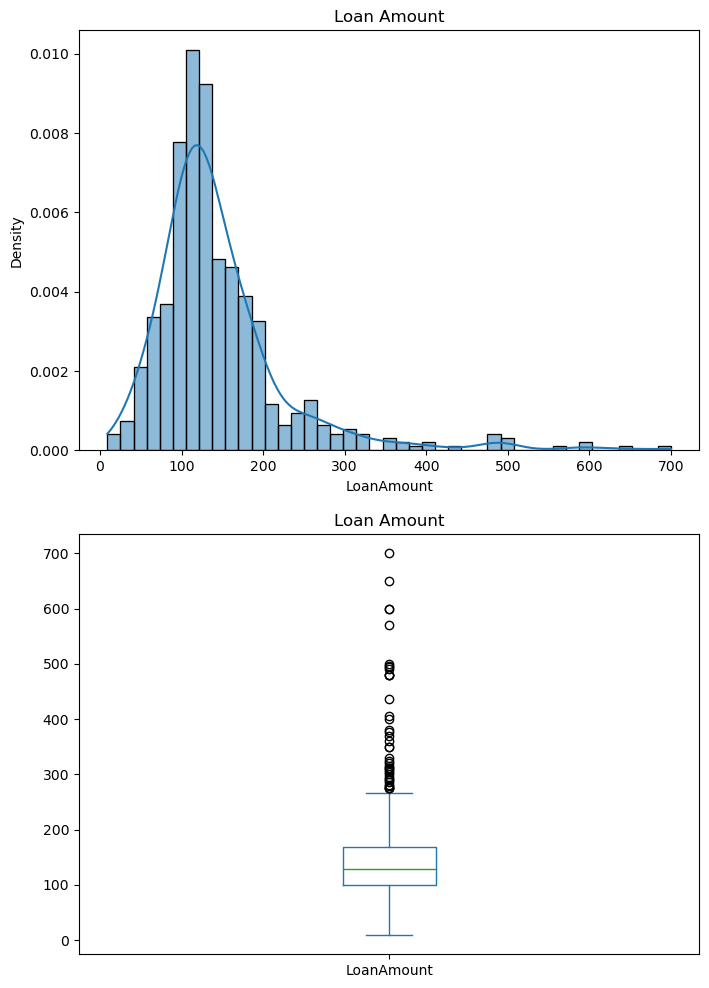

In [22]:
plt.figure(figsize = (8, 12))
plt.subplot(2, 1, 1)
plt.title("Loan Amount")
sns.histplot(train["LoanAmount"], kde=True, stat="density")

plt.subplot(2, 1, 2)
plt.title("Loan Amount")
train["LoanAmount"].plot.box();

### Categorical Independent Variable vs Target Variable

First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

Now we would like to know how well each feature correlates with Loan Status. So, in the next section, we will look at the bivariate analysis.

In [23]:
# Creating a cross table
gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
married=pd.crosstab(train['Married'],train['Loan_Status']) 
dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
education=pd.crosstab(train['Education'],train['Loan_Status']) 
self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 

In [39]:
def groupped_bar(data, name = "COLUMN NAME", percentage = "f"):
    
    """GRAPHING THE GROUPPED BARS
    
    1. Getting the names we are going to put in.
    2. Getting the values for the bars. (Columns)
    3. Getting the x_ticks"""

    # FORMAT NUMBER
    number_format = "%g"

    # LABELS
    
    
    x_label = list(data.columns) # Ledgers (columns)
    x_ticks_values = list(data.index.values) # For the x values on the graphs
    
        
    # WIDTH
    
    w = 0.4

    # DATA: Format - N - Y
    
    # CREATING DICT SO WE CAN HAVE THE REQUIRED NUMBER OF VARIABLES  
    
    ledger = {} # Ledger
    data_bar = {} # Data to plot
    bar = {} # Creating the barchart
    
    for suffix in range(len(x_label)): # Extracting data       
                
        index = x_label[suffix] # Picking the column (Ledgers)
        
        # Data for the chart
        data_bar["data_bar_" + str(suffix + 1)] = list(data[index]) # Taking the data to plot
        ledger["ledger_" + str(suffix + 1)] = index
                
        # End of 4


    # PERCENTAGES IF NEEDED.
    
    if(percentage == "p"): 
        
        plt.ylim(0, 100)
        number_format = '%.2f%%' # Format of 3 decimal and in percentage
        results_bar_1 = [] # To get the results
        results_bar_2 = []
        last_value = [] # To get the previous value
        current_value = [] # to get the current value
        count = 0
        
        for key in data_bar.values():
        # CAPTURING THE KEY VALUES, SO I CAN GET THE LIST OF VALUES FROM THE DICT
        # WE NEED TO CAPTURE THE VALUES INDIVIDUALLY

            # print(key)
            if(count == 0):
                results = key
                count +=1
            else:
                # ADDING THE FINAL VALUES TO A DICT FOR LATER ON
                last_value = results
                results = []
                for operation in range(0, len(key)):

                    # print(last_value[operation])
                    # print(key[operation]) 

                    # CALCULATING THE PERCENTAGE FOR N AND Y
                    
                    # N
                    results_bar_1.append((last_value[operation])/(last_value[operation] + key[operation])*100) # Percentage for N

                    # Y
                    results_bar_2.append((key[operation])/(last_value[operation] + key[operation])*100) # Percentage for Y

            # End of 4

        # REPLACING THE VALUES ON THE ORIGINAL DICT

        data_bar["data_bar_1"] = results_bar_1
        data_bar["data_bar_2"] = results_bar_2
        
        
        # End of if
        
    
    
    # LOCATIONS
    location_x = np.arange(len(x_ticks_values)) # location of x ticks of the first bar
    location_y = [i + w for i in location_x] # location of x ticks of the second bar
    

    # DRAWING THE BARS: Saving it into a variable to put the values on top   

    for suffix in range(len(data_bar)):
        
        if(suffix == 0):
            bar["bar_" + str(suffix + 1)] = plt.bar(location_x, data_bar["data_bar_" + str(suffix + 1)], w, label = ledger["ledger_" + str(suffix + 1)], ec = "black")
        else:
            bar["bar_" + str(suffix + 1)] = plt.bar(location_y, data_bar["data_bar_" + str(suffix + 1)], w, label = ledger["ledger_" + str(suffix + 1)], ec = "black")
        
        # bar_1 = plt.bar(location_x, "data_bar_" + str(suffix + 1), w, label = "ledger_" + str(suffix + 1), ec = "black")
        # bar_2 = plt.bar(location_x, "data_bar_" + str(suffix + 1), w, label = "ledger_" + str(suffix + 1), ec = "black")
    
    # TITLE
    plt.title(name + " vs LOAN STATUS")

    # NAME OF THE LABELS    
    plt.ylabel("APPROVAL RATE")

    # NAME OF THE VALUES ON X
    plt.xticks(location_x + w/2, list(data.index)) # (location + width/2, label)
    plt.legend()

    # PUTTING THE NUMBERS ON TOP

    for suffix in range(len(bar)):
        plt.bar_label(bar["bar_" + str(suffix + 1)], label_type="edge", padding = 1, fmt=number_format)  
        
    plt.tight_layout()

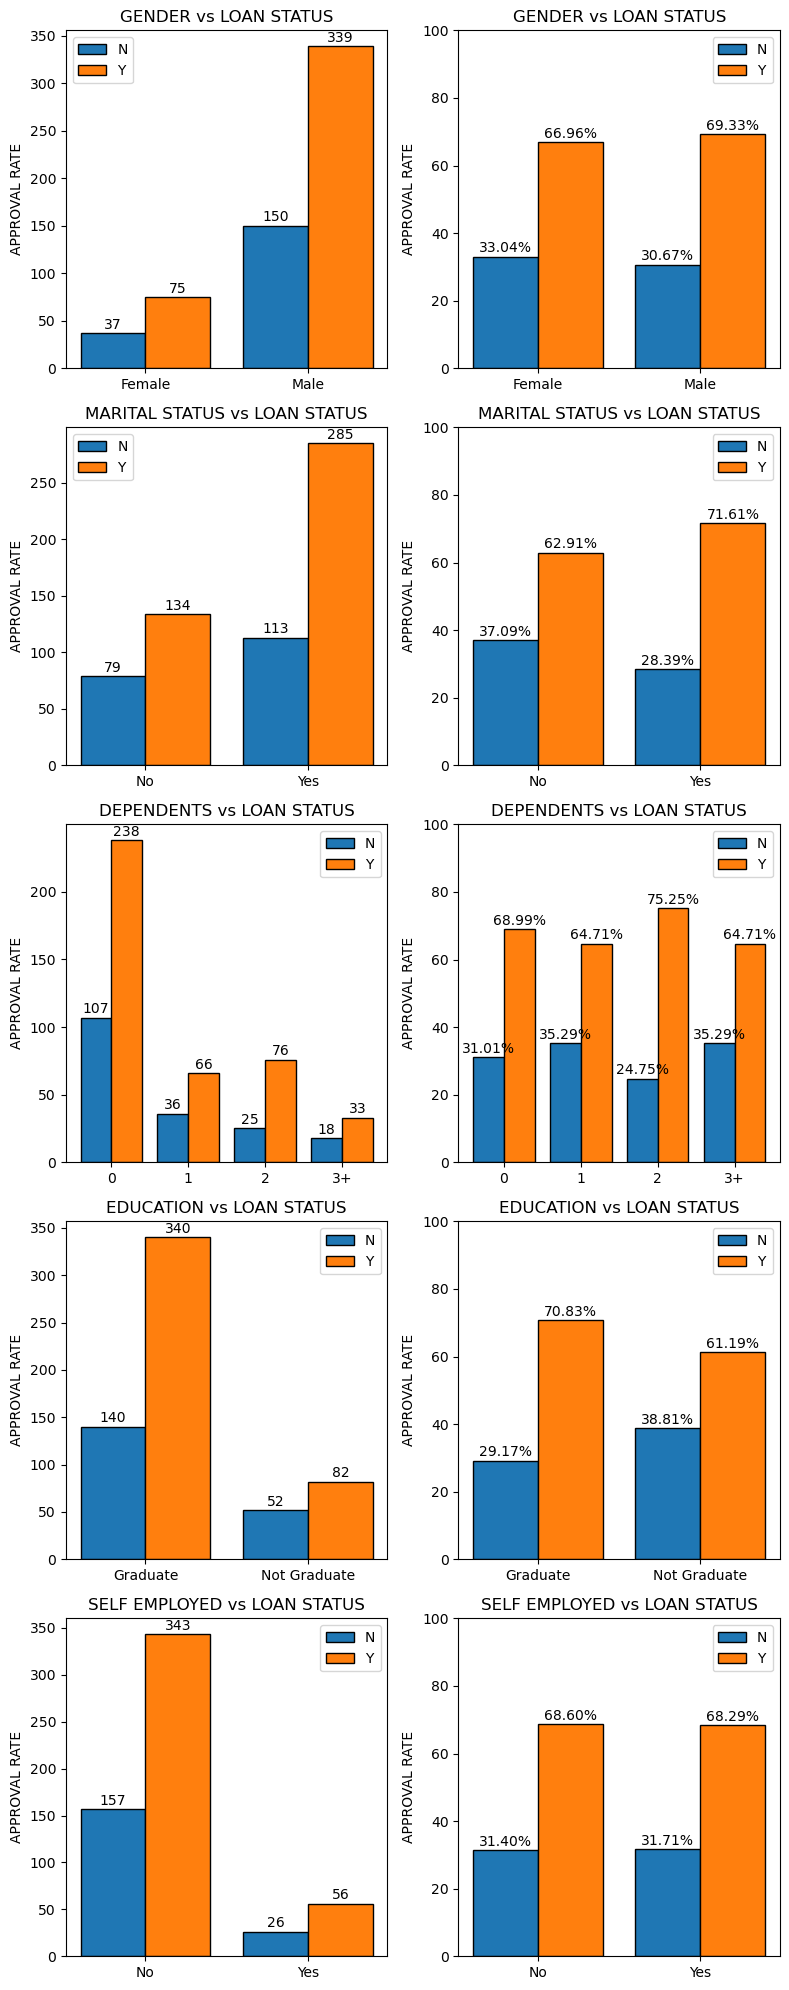

In [43]:
fig=plt.figure(figsize=(8,20))
plt.subplot(5,2,1)
groupped_bar(gender, "GENDER")
plt.subplot(5,2,2)
groupped_bar(gender,"GENDER", "p")

plt.subplot(5,2,3)
groupped_bar(married, "MARITAL STATUS")
plt.subplot(5,2,4)
groupped_bar(married, "MARITAL STATUS", "p")

plt.subplot(5,2,5)
groupped_bar(dependents, "DEPENDENTS")
plt.subplot(5,2,6)
groupped_bar(dependents, "DEPENDENTS", "p")

plt.subplot(5,2,7)
groupped_bar(education, "EDUCATION")
plt.subplot(5,2,8)
groupped_bar(education, "EDUCATION", "p")

plt.subplot(5,2,9)
groupped_bar(self_Employed, "SELF EMPLOYED")
plt.subplot(5,2,10)
groupped_bar(self_Employed, "SELF EMPLOYED", "p")